In [1]:
import os
import logging
from ultralytics import YOLO
from pathlib import Path
from helpers import save_yolo_labels, convert_xywhn_to_x1y1x2y2, show_labeled_image, load_image, print_tree
import matplotlib.pyplot as plt

In [2]:
logging.basicConfig(level=logging.INFO,filename='detection.log', filemode='w', format='%(asctime)s - %(message)s', datefmt='%d-%b-%y %H:%M:%S')

In [3]:
DATASETS_ROOT_PATH = r"D:\master_thesis_wd\datasets"
DETECTION_AND_CLASSIFICATION_DATASET_PATH = os.path.join(DATASETS_ROOT_PATH, "detection_and_classification_dataset")

# Check the number of data from each class

In [4]:
from collections import Counter
class_count = Counter(list(map(lambda x: x.split("_")[0],os.listdir(os.path.join(DETECTION_AND_CLASSIFICATION_DATASET_PATH, "train", "labels")))))
class_count

Counter({'Myeloblast': 184,
         'Basophile': 172,
         'Lymphoblast': 167,
         'Eosinophile': 140,
         'Normoblast': 139,
         'Neutrophile Segment': 92,
         'Monocyte': 73,
         'Lymphocyte': 55,
         'Neutrophile Band': 34})

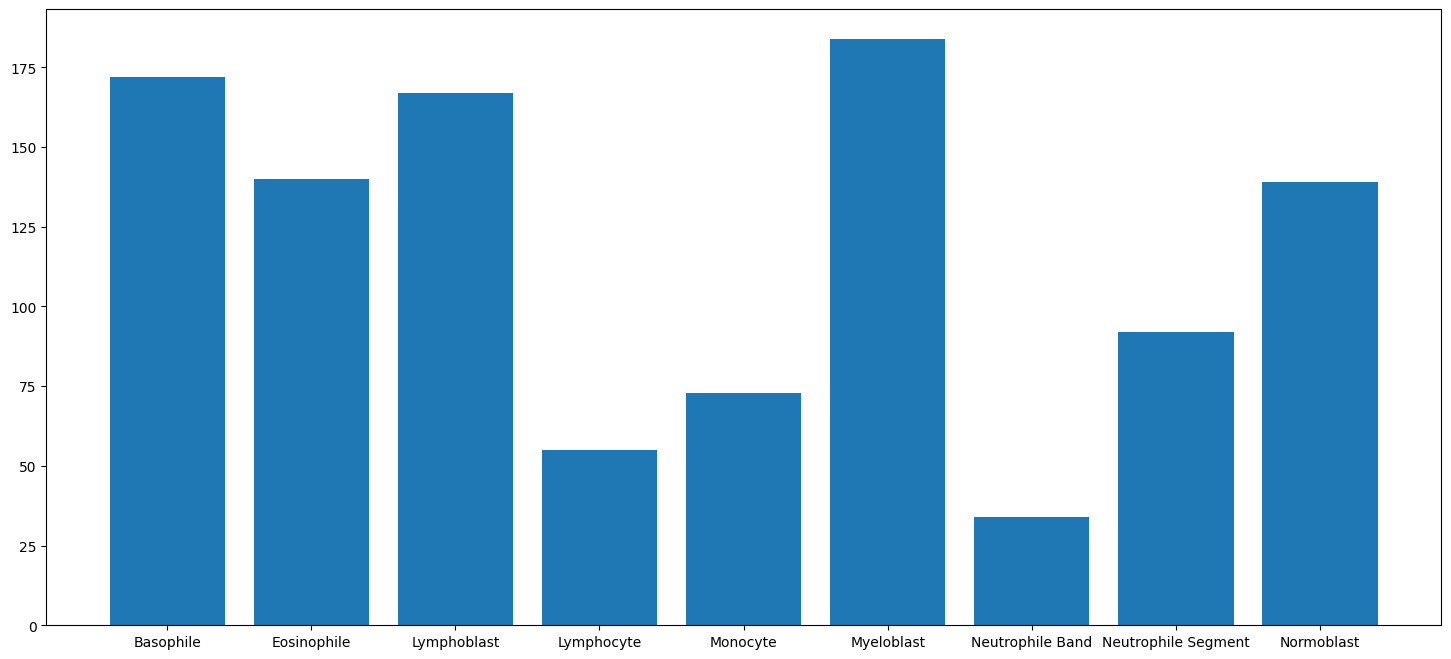

In [5]:
fig, ax = plt.subplots(figsize=(18, 8))
plt.bar(*zip(*class_count.items()))
plt.show()

# Create config for yolo

In [6]:
import yaml
data ={
        'path': DETECTION_AND_CLASSIFICATION_DATASET_PATH,
        'train': 'train/images',
        'val': 'val/images',
        'names': {
            0: 'Basophile',
            1: 'Eosinophile',
            2: 'Lymphoblast',
            3: 'Lymphocyte',
            4: 'Monocyte',
            5: 'Myeloblast',
            6: "Neutrophile Band",
            7: "Neutrophile Segment",
            8: "Normoblast",
        }
}
data_as_dict = dict(data)
with open(r"./detection_and_classification_config.yaml", 'w') as yaml_file:
    yaml.dump(data_as_dict, yaml_file, default_flow_style=False)

# Train YOLOv8

In [7]:
model = YOLO("yolov8n.yaml")
model_train = model.train(data="detection_and_classification_config.yaml", epochs=30, name="detection_and_classification_train")  # train the model


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

train: Scanning D:\master_thesis_wd\datasets\detection_and_classification_dataset\train\labels.cache... 1056 images, 0 
val: Scanning D:\master_thesis_wd\datasets\detection_and_classification_dataset\val\labels.cache... 264 images, 0 backg


Plotting labels to C:\Users\Jakub Lechowski\Desktop\master-thesis\code\runs\detect\detection_and_classification_train10\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000769, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30       2.2G       2.96      4.874      4.204         36        640: 100%|██████████| 66/66 [00:09<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        264        266   0.000126     0.0577   0.000112   2.62e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      2.08G      2.641      3.956      3.488         28        640: 100%|██████████| 66/66 [00:08<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0


                   all        264        266      0.246      0.559      0.249      0.118

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      2.08G      2.113      3.284      2.833         31        640: 100%|██████████| 66/66 [00:08<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0


                   all        264        266       0.34       0.52       0.21      0.105

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      2.08G      1.765      2.898      2.402         30        640: 100%|██████████| 66/66 [00:08<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0


                   all        264        266      0.255      0.695      0.316      0.213

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      2.08G      1.651      2.719      2.222         31        640: 100%|██████████| 66/66 [00:08<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0


                   all        264        266      0.313      0.531      0.319      0.202

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      2.08G      1.549      2.531        2.1         37        640: 100%|██████████| 66/66 [00:08<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0


                   all        264        266      0.387      0.545      0.302      0.207

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      2.08G      1.482      2.389      2.009         39        640: 100%|██████████| 66/66 [00:08<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0


                   all        264        266      0.397       0.53      0.493      0.306

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      2.08G       1.41      2.277      1.931         35        640: 100%|██████████| 66/66 [00:07<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        264        266      0.262      0.756      0.535      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      2.08G      1.354      2.145      1.857         39        640: 100%|██████████| 66/66 [00:08<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0


                   all        264        266      0.723      0.449      0.561      0.409

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      2.08G      1.341      2.094      1.833         30        640: 100%|██████████| 66/66 [00:08<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        264        266      0.566      0.502      0.514      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      2.08G       1.34      2.015      1.833         42        640: 100%|██████████| 66/66 [00:07<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        264        266       0.65      0.519      0.581      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      2.08G       1.26      1.944      1.768         37        640: 100%|██████████| 66/66 [00:08<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        264        266      0.309      0.666      0.475      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      2.08G      1.238      1.862      1.735         23        640: 100%|██████████| 66/66 [00:07<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0


                   all        264        266      0.405      0.755      0.632      0.454

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      2.08G      1.243      1.783      1.738         27        640: 100%|██████████| 66/66 [00:07<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        264        266      0.524      0.714      0.635      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      2.08G      1.203      1.725      1.696         36        640: 100%|██████████| 66/66 [00:07<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        264        266      0.427      0.733      0.666       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      2.08G      1.217      1.658      1.703         35        640: 100%|██████████| 66/66 [00:08<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0


                   all        264        266      0.659      0.718       0.76      0.577

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      2.08G      1.198      1.632      1.675         42        640: 100%|██████████| 66/66 [00:07<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        264        266      0.684      0.762      0.798      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      2.08G       1.19      1.604      1.661         30        640: 100%|██████████| 66/66 [00:07<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0


                   all        264        266       0.72      0.698      0.738      0.568

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      2.08G       1.18       1.57      1.663         39        640: 100%|██████████| 66/66 [00:07<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        264        266       0.49      0.765      0.653      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      2.08G      1.172      1.546      1.652         27        640: 100%|██████████| 66/66 [00:07<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0


                   all        264        266      0.504      0.702      0.608       0.46
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      2.22G     0.9622      1.402      1.449         17        640: 100%|██████████| 66/66 [00:08<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        264        266      0.788      0.705      0.816      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      2.08G     0.8942      1.322       1.39         16        640: 100%|██████████| 66/66 [00:07<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        264        266      0.535      0.778      0.746      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      2.08G     0.9076      1.237      1.401         16        640: 100%|██████████| 66/66 [00:07<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0


                   all        264        266      0.723      0.701       0.77      0.586

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      2.08G     0.8745      1.179      1.369         16        640: 100%|██████████| 66/66 [00:07<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        264        266      0.594      0.804      0.781      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      2.08G     0.8687       1.17       1.37         16        640: 100%|██████████| 66/66 [00:07<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        264        266      0.834      0.752      0.825      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      2.08G     0.8568      1.112      1.353         16        640: 100%|██████████| 66/66 [00:07<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        264        266      0.857      0.721       0.83      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      2.08G     0.8553      1.091      1.355         18        640: 100%|██████████| 66/66 [00:07<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        264        266      0.845      0.753      0.826       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      2.08G     0.8393      1.041      1.322         16        640: 100%|██████████| 66/66 [00:07<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        264        266      0.834      0.752      0.835      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      2.08G     0.8409      1.038      1.334         16        640: 100%|██████████| 66/66 [00:07<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        264        266      0.797      0.734      0.799      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      2.08G     0.8154      1.006      1.313         16        640: 100%|██████████| 66/66 [00:07<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        264        266      0.879      0.773      0.852       0.68



30 epochs completed in 0.086 hours.
Optimizer stripped from C:\Users\Jakub Lechowski\Desktop\master-thesis\code\runs\detect\detection_and_classification_train10\weights\last.pt, 6.3MB
Optimizer stripped from C:\Users\Jakub Lechowski\Desktop\master-thesis\code\runs\detect\detection_and_classification_train10\weights\best.pt, 6.3MB

Validating C:\Users\Jakub Lechowski\Desktop\master-thesis\code\runs\detect\detection_and_classification_train10\weights\best.pt...
Ultralytics YOLOv8.1.1 🚀 Python-3.10.6 torch-2.1.2+cu118 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLOv8n summary (fused): 168 layers, 3007403 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0


                   all        264        266      0.879      0.773      0.852       0.68
             Basophile        264         35      0.957      0.971      0.991      0.762
           Eosinophile        264         27      0.836      0.941      0.959      0.732
           Lymphoblast        264         45       0.89      0.896      0.951      0.762
            Lymphocyte        264         23          1      0.669      0.922      0.796
              Monocyte        264         32      0.852      0.719      0.843      0.638
            Myeloblast        264         41      0.657      0.805      0.869      0.661
      Neutrophile Band        264          7          1          0      0.203      0.164
   Neutrophile Segment        264         25       0.91       0.96       0.94      0.762
            Normoblast        264         31      0.813          1       0.99      0.839
Speed: 0.3ms preprocess, 1.6ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to C:\Users\Ja

# Load model metrics

In [8]:
import cv2
import matplotlib.pyplot as plt

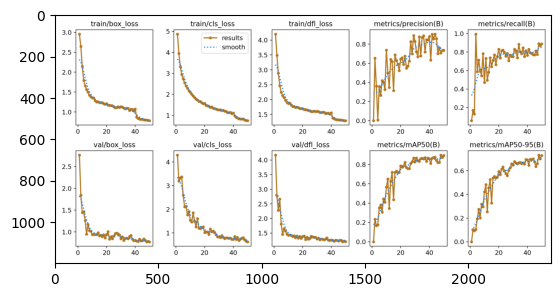

In [9]:
%matplotlib inline

loss = cv2.imread(r"C:\Users\Jakub Lechowski\Desktop\master-thesis\code\runs\detect\detection_and_classification_train\results.png")
plt.imshow(loss)

In [10]:
metrics = model.val()

Ultralytics YOLOv8.1.1 🚀 Python-3.10.6 torch-2.1.2+cu118 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLOv8n summary (fused): 168 layers, 3007403 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning D:\master_thesis_wd\datasets\detection_and_classification_dataset\val\labels.cache... 264 images, 0 backg
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03


                   all        264        266       0.88      0.773      0.852       0.68
             Basophile        264         35      0.957      0.971      0.993      0.764
           Eosinophile        264         27      0.835       0.94      0.959      0.732
           Lymphoblast        264         45       0.89      0.895      0.951      0.758
            Lymphocyte        264         23          1      0.668      0.922      0.796
              Monocyte        264         32      0.852      0.718      0.843      0.638
            Myeloblast        264         41      0.661      0.808       0.87      0.668
      Neutrophile Band        264          7          1          0      0.203      0.164
   Neutrophile Segment        264         25      0.914       0.96       0.94      0.761
            Normoblast        264         31      0.814          1       0.99      0.843
Speed: 0.4ms preprocess, 3.9ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to C:\Users\Ja

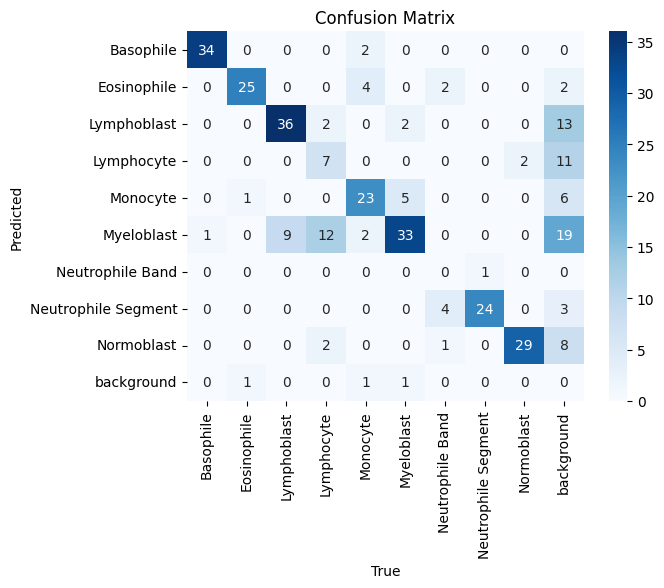

In [11]:
import seaborn as sns
sns.heatmap(metrics.confusion_matrix.matrix,
            annot=True,
            cmap="Blues",
            xticklabels=["Basophile",
                         "Eosinophile",
                         "Lymphoblast",
                         "Lymphocyte",
                         "Monocyte",
                         'Myeloblast',
                         "Neutrophile Band",
                         "Neutrophile Segment",
                         "Normoblast",
                         "background"],
            yticklabels=["Basophile",
                         "Eosinophile",
                         "Lymphoblast",
                         "Lymphocyte",
                         "Monocyte",
                         'Myeloblast',
                         "Neutrophile Band",
                         "Neutrophile Segment",
                         "Normoblast",
                         "background",])
plt.ylabel('Predicted')
plt.xlabel('True')
plt.title('Confusion Matrix')
plt.show()

In [12]:
metrics.results_dict

{'metrics/precision(B)': 0.880169483895559,
 'metrics/recall(B)': 0.773322145867459,
 'metrics/mAP50(B)': 0.8521932352797531,
 'metrics/mAP50-95(B)': 0.6804056074412114,
 'fitness': 0.6975843702250656}

In [13]:
import pandas as pd
def predict_labels(yolo_model, img_dir: str, label_dir: str):
    predictions = yolo_model.predict(img_dir, save=False, verbose=True, stream=True)
        
    item_df = pd.DataFrame(
        columns=[
            "img_name",
            "label",
            "x_center",
            "y_center",
            "width",
            "height",
        ]
    )
    for item in predictions:
        image_name = os.path.splitext(os.path.basename(item.path))[0]
        n_objects_detected = item.boxes.shape[0]

        for i in range(n_objects_detected):
            row = {}
            row["img_name"] = image_name
            row["label"] = int(item.boxes.cls[i].tolist())
            row["x_center"] =  item.boxes.xywhn[i][0].tolist()
            row["y_center"] =  item.boxes.xywhn[i][1].tolist()
            row["width"] =  item.boxes.xywhn[i][2].tolist()
            row["height"] =  item.boxes.xywhn[i][3].tolist()
            row_df = pd.DataFrame(row, index=[0])
            item_df = pd.concat([item_df, row_df])
    save_yolo_labels(item_df, label_dir)
    return item_df

In [14]:
DATASET_4_PATH = r"D:\master_thesis_wd\datasets\dataset4"

In [15]:
if not os.path.exists(os.path.join(DATASET_4_PATH, "predicted_yolo_labels")):    
    os.mkdir(os.path.join(DATASET_4_PATH, "predicted_yolo_labels"))

In [16]:
labels = predict_labels(model, os.path.join(DATASET_4_PATH, "images"),  os.path.join(DATASET_4_PATH, "predicted_yolo_labels"))


image 1/23 D:\master_thesis_wd\datasets\dataset4\images\Snap-1445.tif: 512x640 (no detections), 81.0ms
image 2/23 D:\master_thesis_wd\datasets\dataset4\images\Snap-1486.tif: 544x640 1 Neutrophile Segment, 72.5ms
image 3/23 D:\master_thesis_wd\datasets\dataset4\images\Snap-1487.tif: 544x640 (no detections), 10.0ms
image 4/23 D:\master_thesis_wd\datasets\dataset4\images\Snap-1488.tif: 544x640 1 Neutrophile Segment, 11.0ms
image 5/23 D:\master_thesis_wd\datasets\dataset4\images\Snap-1489.tif: 544x640 2 Neutrophile Segments, 11.0ms
image 6/23 D:\master_thesis_wd\datasets\dataset4\images\Snap-1490.tif: 544x640 2 Neutrophile Segments, 11.5ms
image 7/23 D:\master_thesis_wd\datasets\dataset4\images\Snap-1491.tif: 544x640 (no detections), 14.0ms
image 8/23 D:\master_thesis_wd\datasets\dataset4\images\Snap-1492.tif: 544x640 (no detections), 14.0ms
image 9/23 D:\master_thesis_wd\datasets\dataset4\images\Snap-1493.tif: 544x640 (no detections), 12.0ms
image 10/23 D:\master_thesis_wd\datasets\datas

100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 2848.62it/s]


In [17]:
import random

In [18]:
invert_wbc_dataset4_labels= {
    "0": 'Basophile',
    "1": 'Eosinophile',
    "2": 'Lymphoblast',
    "3": 'Lymphocyte',
    "4": 'Monocyte',
    "5": 'Myeloblast',
    "6": "Neutrophile Band",
    "7": "Neutrophile Segment",
    "8": "Normoblast",
}

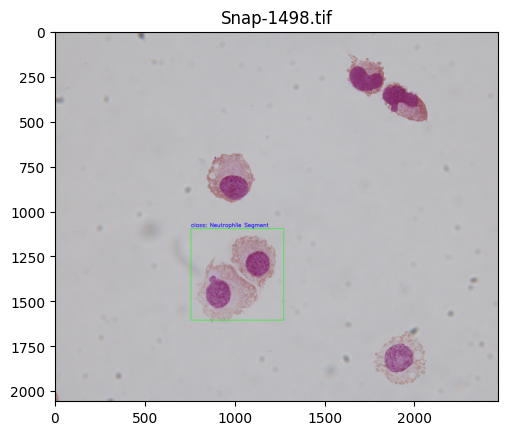

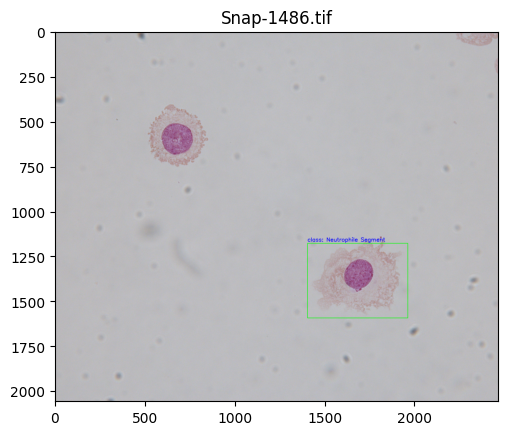

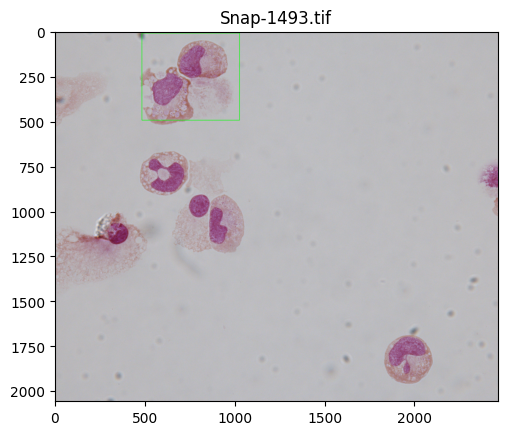

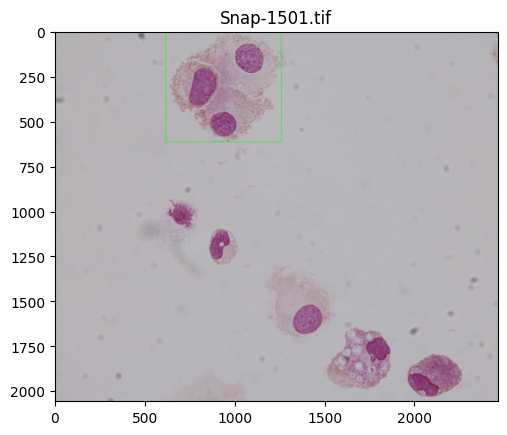

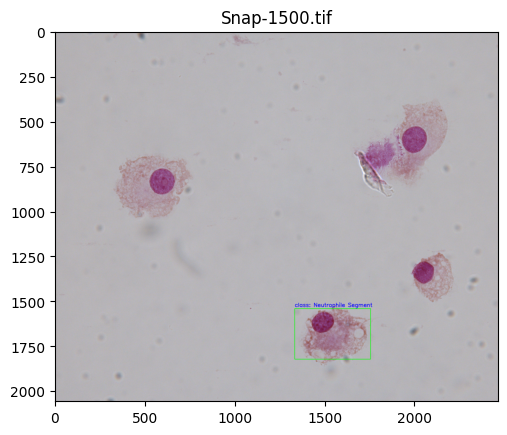

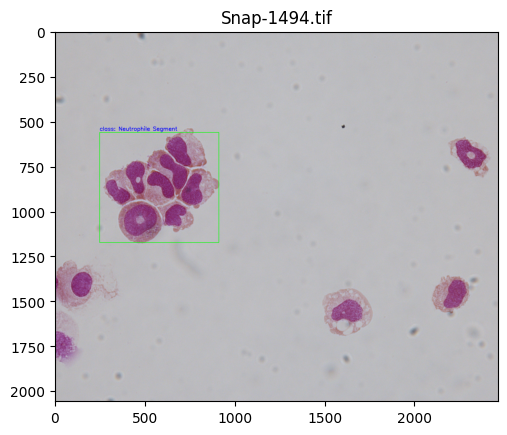

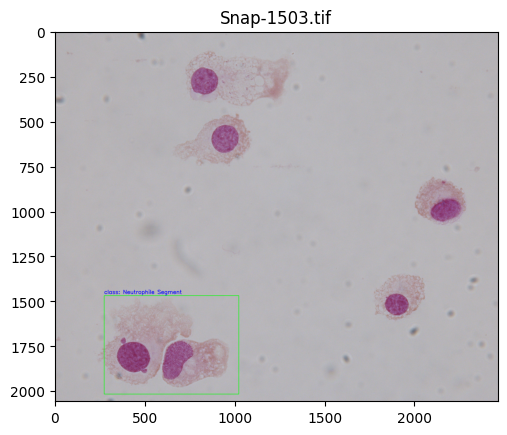

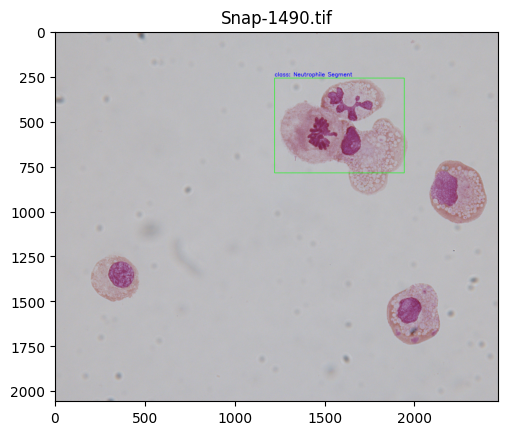

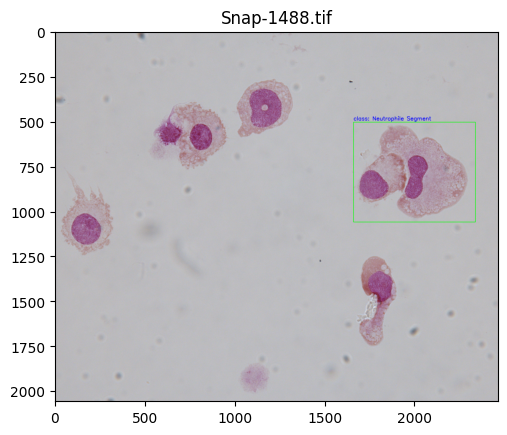

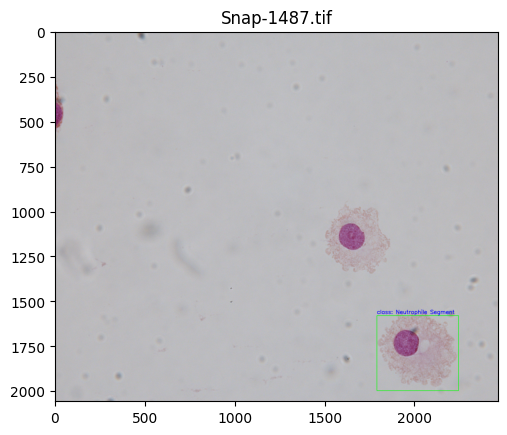

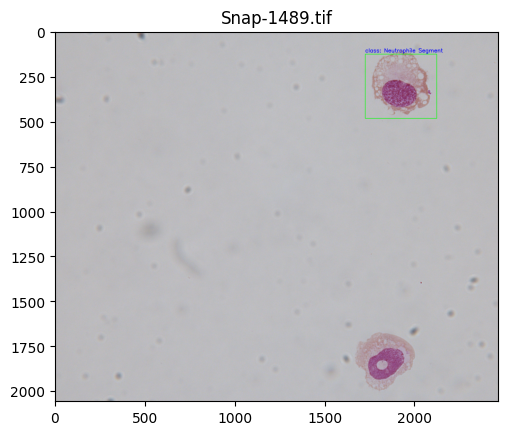

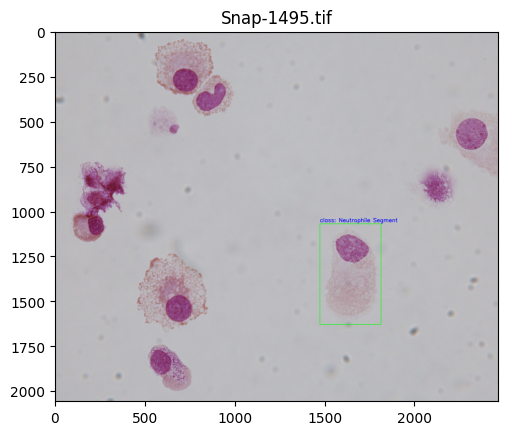

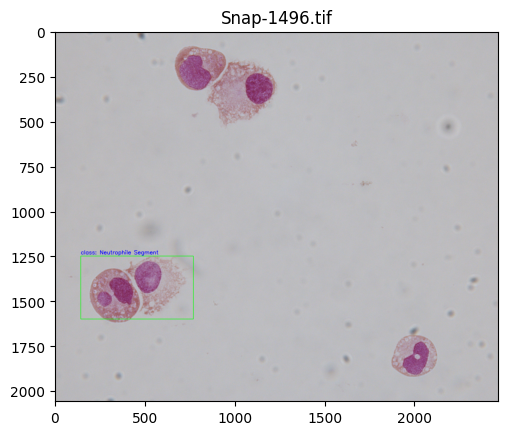

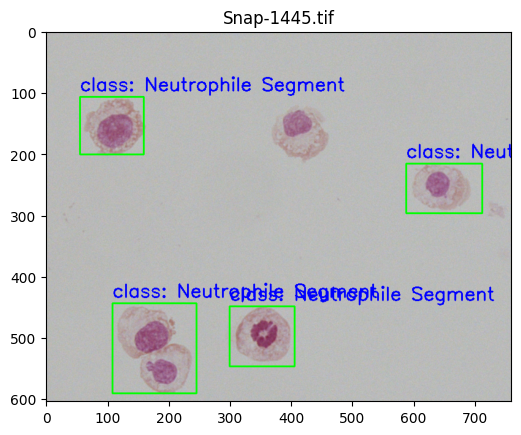

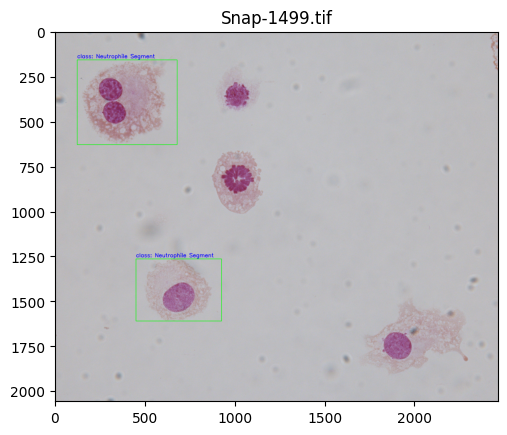

In [19]:
IMAGES_PATH = os.path.join(DATASET_4_PATH, "images")
YOLO_LABELS_PATH =  os.path.join(DATASET_4_PATH, "predicted_yolo_labels")
for image_path in random.sample(os.listdir(IMAGES_PATH), 23):
    label_path = os.path.join(YOLO_LABELS_PATH, os.path.splitext(image_path)[0] + ".txt")
    if not os.path.exists(label_path):
        continue
    show_labeled_image(os.path.join(IMAGES_PATH, image_path), label_path, label_map = invert_wbc_dataset4_labels)